In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Charger le dataset
df = pd.read_csv("DISASTERS_CLEANED.csv")


In [2]:
disaster_type_map = {
    0: "Drought",
    1: "Earthquake",
    2: "Volcanic activity",
    3: "Mass movement (dry)",
    4: "Storm",
    5: "Flood",
    6: "Landslide",
    7: "Epidemic",
    8: "Wildfire",
    9: "Extreme temperature",
    10: "Fog",
    11: "Insect infestation",
    12: "Impact",
    13: "Animal accident",
    14: "Glacial lake outburst"
}
continent_map = {
    0: "Africa",
    1: "Asia",
    2: "Americas",
    3: "Europe",
    4: "Oceania"
}
season_map = {
    0: "Winter",
    1: "Spring",
    2: "Fall",
    3: "Summer",
    4: "Unknown"
}


Application des labels

In [3]:
df["Disaster_Type_Label"] = df["Disaster Type"].map(disaster_type_map)
df["Continent_Label"] = df["Continent"].map(continent_map)
df["Season_Label"] = df["Season"].map(season_map)


Catastrophes par type

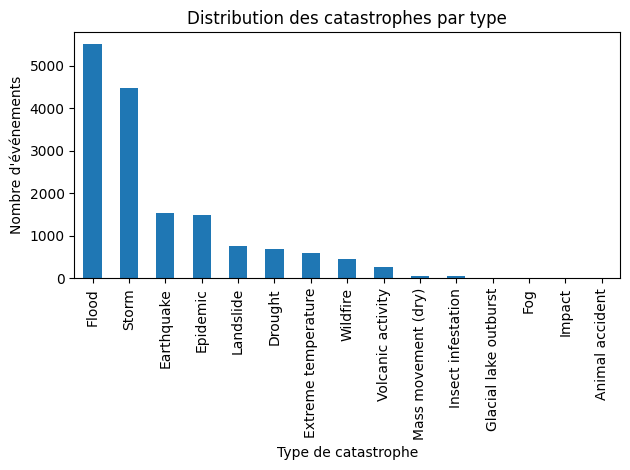

In [4]:
plt.figure()
df["Disaster_Type_Label"].value_counts().plot(kind="bar")
plt.title("Distribution des catastrophes par type")
plt.xlabel("Type de catastrophe")
plt.ylabel("Nombre d'événements")
plt.tight_layout()
plt.show()


Catastrophes par continent

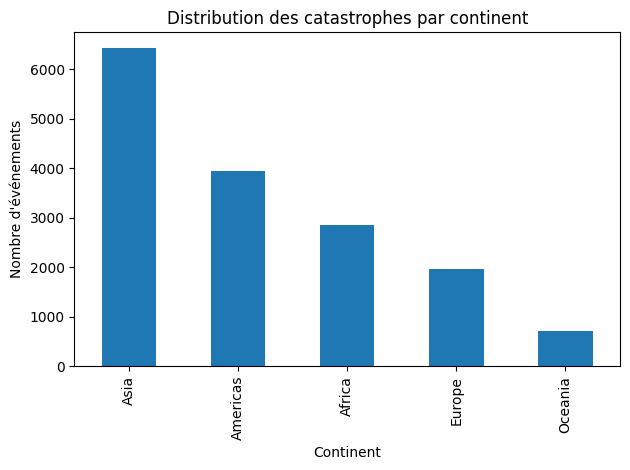

In [5]:
plt.figure()
df["Continent_Label"].value_counts().plot(kind="bar")
plt.title("Distribution des catastrophes par continent")
plt.xlabel("Continent")
plt.ylabel("Nombre d'événements")
plt.tight_layout()
plt.show()


Catastrophes par saison

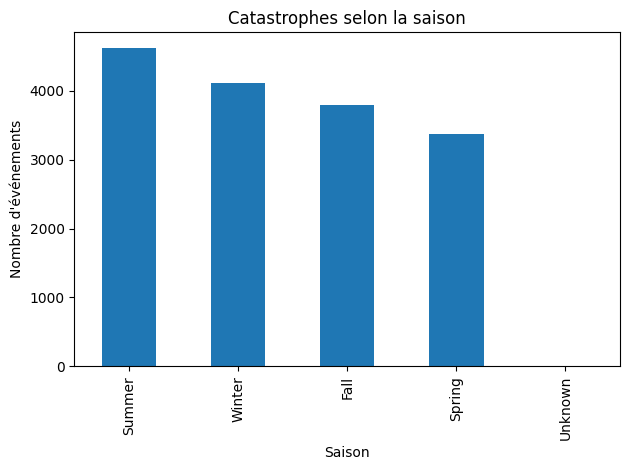

In [6]:
plt.figure()
df["Season_Label"].value_counts().plot(kind="bar")
plt.title("Catastrophes selon la saison")
plt.xlabel("Saison")
plt.ylabel("Nombre d'événements")
plt.tight_layout()
plt.show()


Évolution temporelle par année

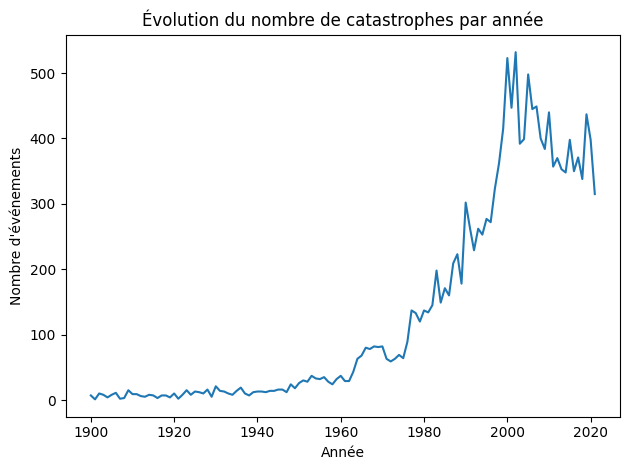

In [7]:
plt.figure()
df["Year"].value_counts().sort_index().plot()
plt.title("Évolution du nombre de catastrophes par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'événements")
plt.tight_layout()
plt.show()


Catastrophes selon Latitude / Longitude, colorées par Disaster Type

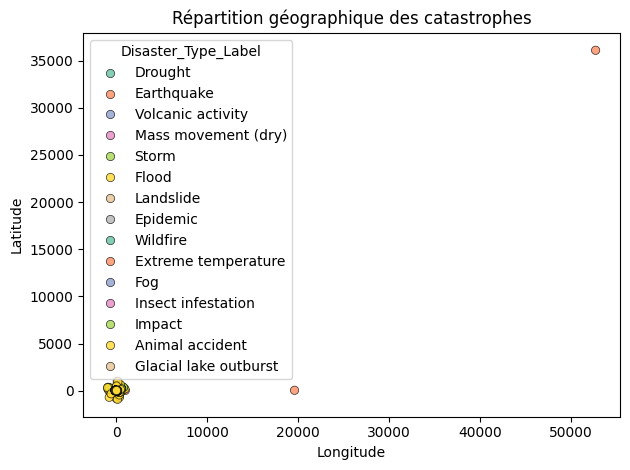

In [8]:
disaster_type_map = {
    0: "Drought", 1: "Earthquake", 2: "Volcanic activity", 3: "Mass movement (dry)",
    4: "Storm", 5: "Flood", 6: "Landslide", 7: "Epidemic", 8: "Wildfire",
    9: "Extreme temperature", 10: "Fog", 11: "Insect infestation",
    12: "Impact", 13: "Animal accident", 14: "Glacial lake outburst"
}

df["Disaster_Type_Label"] = df["Disaster Type"].map(disaster_type_map)

sns.scatterplot(
    x="Longitude",
    y="Latitude",
    data=df,
    hue="Disaster_Type_Label",
    palette="Set2",
    legend="brief",
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

plt.title("Répartition géographique des catastrophes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


Évolution du nombre de catastrophes par année, séparée par Continent

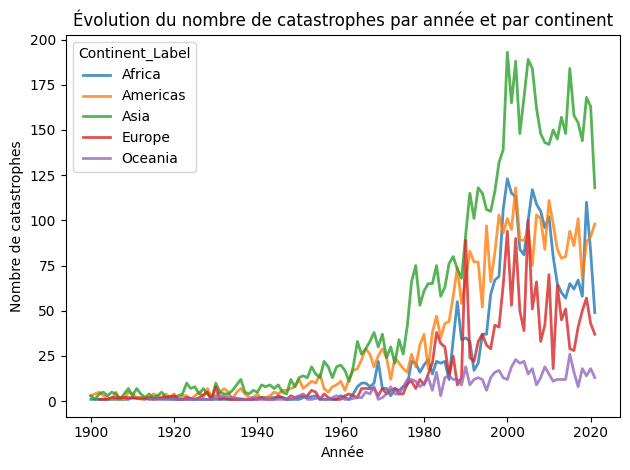

In [9]:
events_per_year = (
    df.groupby(["Year", "Continent_Label"])
    .size()
    .reset_index(name="Nb_Events")
)

sns.lineplot(
    x="Year",
    y="Nb_Events",
    data=events_per_year,
    hue="Continent_Label",
    markers=True,
    dashes=False,
    errorbar="sd",
    alpha=0.8,
    linewidth=2
)

plt.title("Évolution du nombre de catastrophes par année et par continent")
plt.xlabel("Année")
plt.ylabel("Nombre de catastrophes")
plt.tight_layout()
plt.show()


Évolution du total des morts par année, par Disaster Type

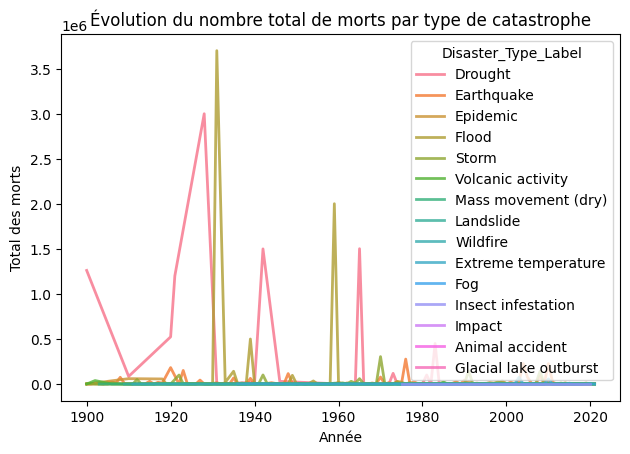

In [10]:
deaths_per_year = (
    df.groupby(["Year", "Disaster_Type_Label"])["Total Deaths"]
    .sum()
    .reset_index()
)

sns.lineplot(
    x="Year",
    y="Total Deaths",
    data=deaths_per_year,
    hue="Disaster_Type_Label",
    markers=True,
    dashes=False,
    errorbar="sd",
    alpha=0.8,
    linewidth=2
)

plt.title("Évolution du nombre total de morts par type de catastrophe")
plt.xlabel("Année")
plt.ylabel("Total des morts")
plt.tight_layout()
plt.show()


C:\Users\ZR\AppData\Local\Temp\ipykernel_3208\336092004.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


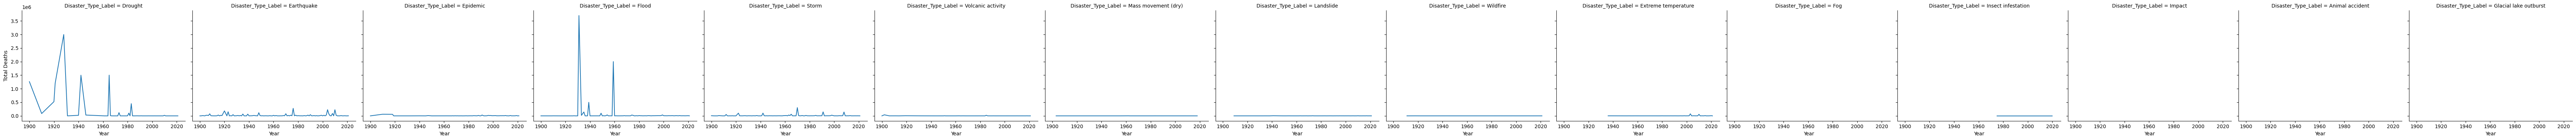

In [11]:
sns.relplot(
    x="Year",
    y="Total Deaths",
    data=deaths_per_year,
    palette="Set2",
    kind="line",
    col="Disaster_Type_Label",
    markers=True,
    dashes=False,
    errorbar="sd",#ecartype
    height=4,
    aspect=1.2
)

Top 6 disaster types by average deaths

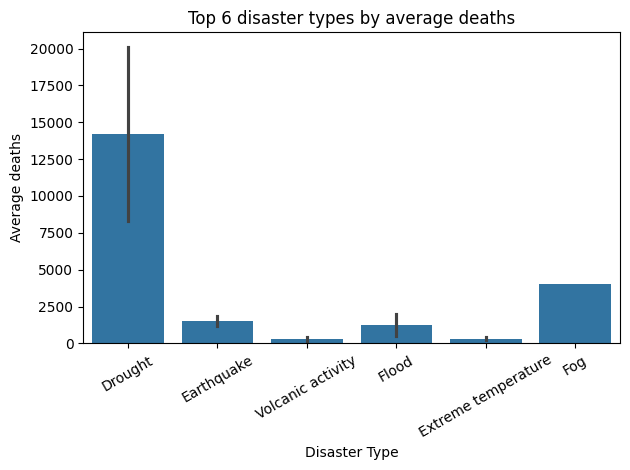

In [12]:
disaster_type_map = {
    0: "Drought", 1: "Earthquake", 2: "Volcanic activity",
    3: "Mass movement (dry)", 4: "Storm", 5: "Flood",
    6: "Landslide", 7: "Epidemic", 8: "Wildfire",
    9: "Extreme temperature", 10: "Fog",
    11: "Insect infestation", 12: "Impact",
    13: "Animal accident", 14: "Glacial lake outburst"
}

df["Disaster_Type_Label"] = df["Disaster Type"].map(disaster_type_map)

# Select top 6 types only
top_types = (
    df.groupby("Disaster_Type_Label")["Total Deaths"]
    .mean()
    .sort_values(ascending=False)
    .head(6)
    .index
)

df_top = df[df["Disaster_Type_Label"].isin(top_types)]

sns.barplot(
    x="Disaster_Type_Label",
    y="Total Deaths",
    data=df_top,
    estimator=np.mean,
    errorbar="se"
)

plt.title("Top 6 disaster types by average deaths")
plt.xlabel("Disaster Type")
plt.ylabel("Average deaths")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Distribution of deaths for one disaster type only

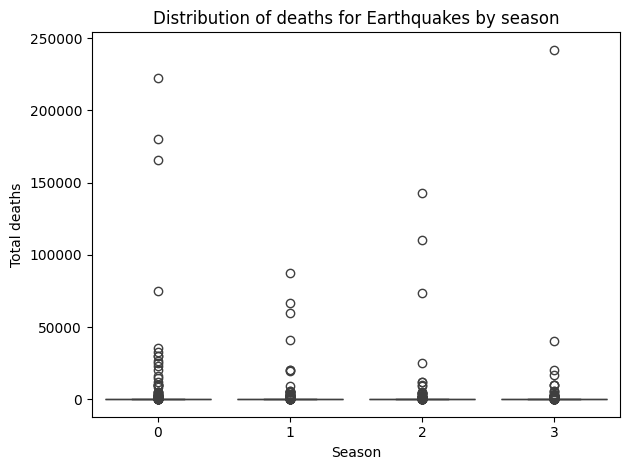

In [13]:
flood_df = df[df["Disaster_Type_Label"] == "Earthquake"]

sns.boxplot(
    x="Season",
    y="Total Deaths",
    data=flood_df
)

plt.title("Distribution of deaths for Earthquakes by season")
plt.xlabel("Season")
plt.ylabel("Total deaths")
plt.tight_layout()
plt.show()


Number of disasters by continent

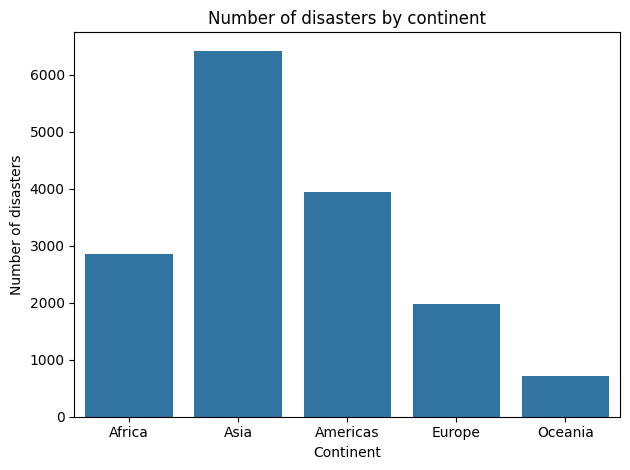

In [14]:
continent_map = {
    0: "Africa", 1: "Asia", 2: "Americas", 3: "Europe", 4: "Oceania"
}
df["Continent_Label"] = df["Continent"].map(continent_map)

sns.countplot(
    x="Continent_Label",
    data=df
)

plt.title("Number of disasters by continent")
plt.xlabel("Continent")
plt.ylabel("Number of disasters")
plt.tight_layout()
plt.show()
